# DispersionCurve

> Joseph P. Vantassel, The University of Texas at Austin

This file is intended as a gallery for the class `DispersionCurve` from `swipp`.

## Table of Contents

- [DispersionCurve](#DispersionCurve)
    - [Creating a DispersionCurve](#Creating-a-DispersionCurve)
        - [DispersionCurve()](#DispersionCurve())
        - [from_simple_profiles()](#from_simple_profiles())
        - [from_geopsy()](#from_geopsy())    
    - [Working with a GroundModel](#Working-with-a-GroundModel)
        - [resample()](#resample())
        - [plotting](#plotting)

In [1]:
import swipp
import numpy as np
import matplotlib.pyplot as plt

## Dispersion Curve

A `DispersionCurve` is defined by a set of `frequency` and `phase-velocity` values. Though as you will see you can equivalently represent a `DispersionCurve` object using `wavelegnth` rather than `frequency` and `slowness` rather than `phase-velocity`.

### Creating a DispersionCurve

#### DispersionCurve()

Create a custom `DispersionCurve` from `frequency` and `velocity` values.

In [2]:
frequency = [0.2,0.5,1,1.5,2,3,5,7,10,15,20,30]                      # Define frequency iterable in (Hz)
velocity = [500,500,400,325,300,250, 220, 200, 150, 100,100,100]     # Define velocity iterable in (m/s)

# Create DispersionCurve
dc = swipp.DispersionCurve(frequency=frequency, velocity=velocity)

print(type(dc))   # View type is DispersionCurve
print(dc)         # View string representation

<class 'swipp.dispersioncurve.DispersionCurve'>
DispersionCurve(frequency=[ 0.2  0.5  1.   1.5  2.   3.   5.   7.  10.  15.  20.  30. ], velocity=[500. 500. 400. 325. 300. 250. 220. 200. 150. 100. 100. 100.])


#### from_geopsy()

Create a `DispersionCurve` from a `.txt` file exported in the `Geopsy` format.

_Note: If the file contains multiple dispersion curves, this method will only read the first and ignore the rest. To capture all of the data see the `from_geopsy()`
method for the `DispersionSuite` object._

In [3]:
# Read DispersionCurve from Geopsy style file
dc = swipp.DispersionCurve.from_geopsy("from_geopsy_dc.txt")

print(type(dc))   # View type is DispersionCurve
print(dc)         # View string representation

<class 'swipp.dispersioncurve.DispersionCurve'>
DispersionCurve(frequency=[ 0.1         0.11394544  0.12983564  0.1479418   0.16857294  0.19208118
  0.21886776  0.24938984  0.28416836  0.32379689  0.36895181  0.42040378
  0.47903095  0.54583394  0.6219529   0.708687    0.80751654  0.92012831
  1.04844429  1.1946545   1.36125437  1.55108733  1.76739334  2.01386419
  2.29470649  2.61471349  2.97934689  3.39483004  3.86825415  4.40769936
  5.0223726   5.72276475  6.52082969  7.43018833  8.46636107  9.64703269
 10.99235422 12.5252868  14.27199363 16.26228648 18.5301345  21.114244
 24.05871903 27.41381418 31.23679223 35.59290154 40.55648962 46.2122721
 52.65677854 60.        ], velocity=[2989.24196119 2983.05957953 2975.85692469 2967.40911212 2957.40529377
 2945.38873387 2930.63091496 2911.83375046 2886.3015789  2847.05796222
 2768.47422543 2498.20382076 1874.86615443 1488.07063041 1268.40921933
 1108.87704945  944.15584979  687.947338    563.73678299  520.75675272
  499.55220516  486.50200

### Working with a DispersionCurve

#### plotting

Easily plot a `DispersionCurve`.

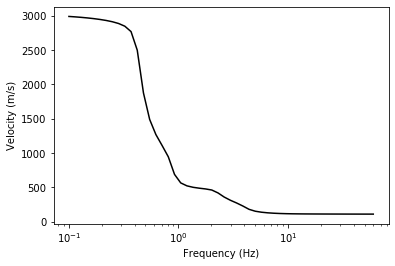

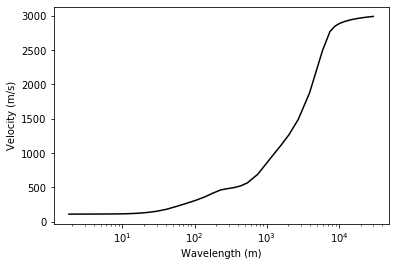

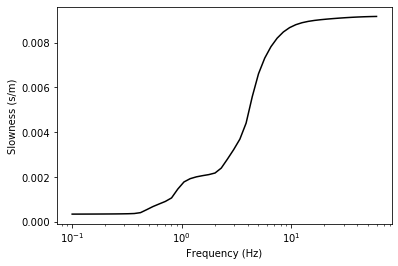

In [4]:
# Read DispersionCurve from Geopsy style file
dc = swipp.DispersionCurve.from_geopsy("from_geopsy_dc.txt")

# Plot in terms of frequency-velocity
plt.plot(dc.frequency, dc.velocity, color="k")
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (m/s)")
plt.show()

# Plot in terms of wavelength-velocity
plt.plot(dc.wavelength, dc.velocity, color="k")
plt.xscale("log")
plt.xlabel("Wavelength (m)")
plt.ylabel("Velocity (m/s)")
plt.show()

# Plot in terms of frequency-slowness
plt.plot(dc.frequency, dc.slowness, color="k")
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Slowness (s/m)")
plt.show()

#### resample()

Easily resample a `DispersionCurve`. Can be done `inplace` if desired.

_Note: You can only resample with this method. You cannot extropolate._

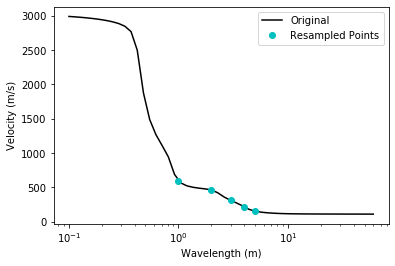

In [10]:
# Read DispersionCurve from Geopsy style file
dc = swipp.DispersionCurve.from_geopsy("from_geopsy_dc.txt")

# Plot in terms of wavelength-velocity
plt.plot(dc.frequency, dc.velocity, color="k", label="Original")
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (m/s)")

# Resample - inplace=False
new_frequency = [1,2,3,4,5]
new_frequency, new_velocity = dc.resample(xx=new_frequency, inplace=False)
plt.plot(new_frequency, new_velocity, marker="o", color="c", linestyle="", label="Resampled Points")

plt.legend()
plt.show()